# **Basic Data Science Projects using Python, NumPy, Pandas, Matplotlib, Regular Expressions, and SQL**


<center>

_By: Prof. James Abello, Haoyang Zhang_

_Computer Science Department_

_Rutgers University_

_Nov. 21, 2024._

</center>


## Topic 1: Game of Life (NumPy, matplotlib)

#### **Objective:** Implement using NumPy and matplotlib a custom version of the Game of Life where users can provide their own update rules.

#### **Estimated Completion Time: 6 hours**

This game is an example of a Cellular Automaton. Each cell corresponds to a point in 2D.

A good video reference is

> Stephen Hawkings The Meaning of Life (John Conway's Game of Life segment) by 0524432
>
> https://www.youtube.com/watch?v=CgOcEZinQ2I


Consider a grid of 2D cells each represented by a 2D unit square. Each cell has two states: dead (encoded as 0) or alive (encoded as 1). Each cell in the grid is updated in discrete time steps depending on the **state of its eight neighbors**.

Initially, some cells are selected randomly to be alive and the rest are dead. The grid is updated in **each time step** according to the following **basic** rules:

- if a dead cell has 3 neighbors alive, then it the comes back to life
- if an alive cell has 2 or 3 neighbors alive, then the cell continues to be alive.
- if an alive cell has less than 2 or more than 3 neighbors alive, then the cell dies.

**The goal** of the game is to find patterns that evolve in interesting ways – something that people have now been doing for over 50 years.

> https://playgameoflife.com/

For example:

- gliders:
  > https://playgameoflife.com/lexicon/glider
- spaceships:
  > https://playgameoflife.com/lexicon#iz5
- splitter
  > https://playgameoflife.com/lexicon/splitter
- Herschel receiver
  > https://playgameoflife.com/lexicon/herschel-receiver
- G4 receiver
  > https://playgameoflife.com/lexicon/G4_receiver

**What to submit:**

- Your code that simulates the game of life with the **basic rules**.
- A 30-second video of a pattern that was generated by your code and you find surprising or interesting.

An approach to be successful is to design on local patterns that could generate other patterns according to the specified rules. Another approach is to try to understand the effect of different rules.


### Tasks


#### Level 1 (fixed set of rules, 15 pts)

From a randomly selected initial subset of life cells, and a fixed set of rules, find interesting patterns


```mermaid
graph TB
    Init["Generate an initial random subset of life cells (2D points)"]
    Draw_init["Display the 2D positions of the selected collection of cells (2D points)"]
    Update["For each cell evaluate the update rules specified above to obtain its new state"]
    Draw["Display the 2D positions of the current life cells (2D points)"]
    More{"Ask the user if he/she wants to update once more?"}

    START([Start])
    END([End])

    START --> Init
    Init --> Draw_init
    Draw_init --> Update
    Update --> Draw
    Draw --> More
    More -- Yes --> Update
    More -- No --> END
```


##### Task 1.1

After playing the game at https://playgameoflife.com/

- Implement a Python function `init_life_state_1()` by using NumPy to generate an initial random subset of life cells (a subset of coordinates whose representing points are considered alive).
- Implement a Python function `draw_life_state_1()` by using matplotlib to display the selected collection of cells (points). Use the following line of Python code to paint the background of the selected collection of cells in light gray.
  ```python
  def draw_cell_background(x, y):
      plt.fill([x-0.5, x-0.5, x+0.5, x+0.5], [y-0.5, y+0.5, y+0.5, y-0.5], color='lightgray')
  ```


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def init_life_state_1(n, m, p):
    """
    Generate an initial random subset of life cells (2D points)
    IN: n, int, number of rows
        m, int, number of columns
        p, float, probability of a cell being alive
    OUT: ndarray of shape (n, m), initial state of the cells
    """
    # Generate a random grid of probabilities
    life_state = np.random.rand(n, m)
    
    # Convert the probabilities to binary values based on the threshold
    life_state = (life_state < p).astype(int)
    
    return life_state

def draw_life_state_1(life_state):
    """
    Display the 2D positions of the selected collection of cells (2D points)
    IN: life_state, ndarray of shape (n, m), initial state of the cells
    OUT: None
    """
    n, m = life_state.shape

    # Create the plot
    plt.figure(figsize=(m, n))  # Adjust size dynamically based on grid dimensions
    plt.axis("off")  # Turn off axes for better visualization
    
    # Draw all cells as gray initially (background grid)
    for x in range(n):
        for y in range(m):
            plt.fill(
                [y, y, y+1, y+1],  # Use whole grid cells [left, left, right, right]
                [x, x+1, x+1, x],  # [bottom, top, top, bottom]
                color='lightgray'
            )
    
    # Set up precise plot limits
    plt.xlim(0, m)
    plt.ylim(0, n)
    plt.gca().invert_yaxis()  # Align the plot to match matrix orientation
    plt.gca().set_aspect('equal')  # Ensure squares are not distorted
    
    for x in range(n + 1):
        plt.plot([0, m], [x, x], color='black', linewidth=0.5)  # Horizontal lines
    for y in range(m + 1):
        plt.plot([y, y], [0, n], color='black', linewidth=0.5)  # Vertical lines
   
    # Loop through the grid to highlight live cells (green)
    for x in range(n):
        for y in range(m):
            if life_state[x, y] == 1:
                # Change cell color to green if it's alive
                plt.fill(
                    [y, y, y+1, y+1],  # Same grid alignment
                    [x, x+1, x+1, x],
                    color='green'
                )

    # Final display
    plt.show()

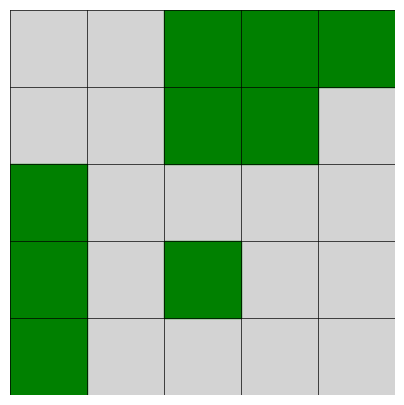

In [2]:
draw_life_state_1(init_life_state_1(5,5,0.5))

##### Task 1.2

Implement a Python function `update_life_state_1()` that takes a 2D NumPy array representing the current state of the grid and returns a new 2D NumPy array representing the next state of the grid according to the rules specified above.

Note: Make sure that all the cells are updated simultaneously. That is, the new state of each cell should be computed based on the original state of all the cells.


In [5]:
import numpy as np

def update_life_state_1(life_state, out_life_state=None):
    """
    For each cell evaluate the update rules specified above to obtain its new state
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
    OUT: ndarray of shape (n, m), next state of the cells
    """
    x, y = life_state.shape
    out_life_state = life_state.copy()  # Create a copy of the state to hold the next generation

    for i in range(x):
        for j in range(y):
            # Get the 3x3 neighborhood, excluding the center cell (i, j)
            # We use np.pad to handle edges, ensuring we don't go out of bounds
            neighborhood = life_state[max(i-1, 0):i+2, max(j-1, 0):j+2]

            # Count the number of live neighbors (excluding the cell itself)
            live_neighbors = np.sum(neighborhood) - life_state[i, j]

            if life_state[i, j] == 1:  # If the current cell is alive
                if live_neighbors < 2 or live_neighbors > 3:
                    out_life_state[i, j] = 0  # Dies due to underpopulation or overpopulation
            else:  # If the current cell is dead
                if live_neighbors == 3:
                    out_life_state[i, j] = 1  # Becomes alive due to reproduction
    return out_life_state

In [4]:
print(init_life_state_1(8,8,0.4))
update_life_state_1(init_life_state_1(8, 8, 0.4))

[[1 1 1 1 0 0 0 0]
 [1 1 1 1 1 0 0 0]
 [0 1 1 1 1 0 1 0]
 [0 1 1 1 0 1 0 0]
 [0 0 1 1 0 1 0 1]
 [0 1 1 0 0 1 0 0]
 [1 1 1 1 1 0 0 0]
 [1 0 1 0 1 0 0 1]]


array([[0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0],
       [1, 0, 1, 0, 0, 1, 1, 0],
       [0, 1, 0, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 1, 0, 1, 0],
       [1, 0, 0, 1, 0, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 0]])

##### Task 1.3

Use `draw_life_state_1()` to display the current state of the grid.


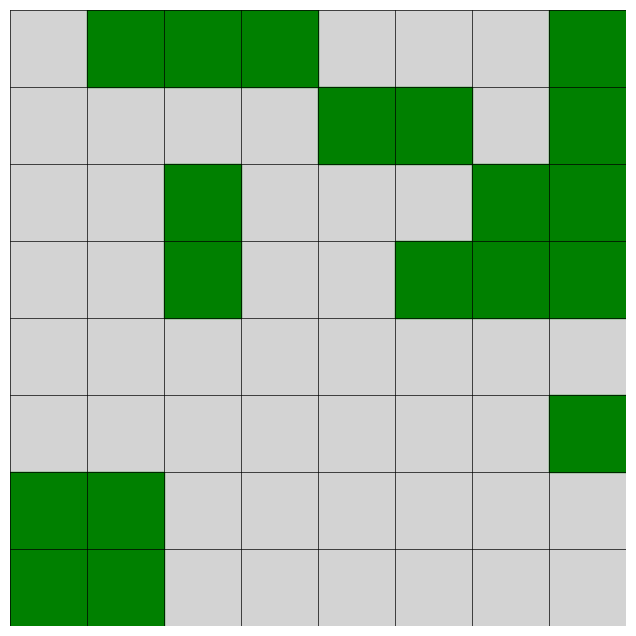

In [5]:
draw_life_state_1(update_life_state_1(init_life_state_1(8, 8, 0.4)))

##### Task 1.4

Implement a Python function `play_game_of_life_1()` that uses the functions implemented above to play the game of life. The function should ask the user the desired number of iterations to update the grid and display the grid at each iteration. When reaching the desired number of iterations, the function should ask the user if he/she wants to update more times. If the user does not want to continue updating, the function should ask the user if he/she wants to save the initial collection of life cells and the final configuration (caveat: this may not be always feasible) as a csv file.


In [35]:
def play_game_of_life_1():
    """
    Play the game of life
    IN: None
    OUT: None
    """
    # ask the user for initial state
    test = input("Enter the number of rows, columns and probability [0,1] of a cell being alive separated by space: ")

    try:
        n, m, p = test.split()
        n = int(n)
        m = int(m)
        p = float(p)

        if p < 0 or p > 1:
            raise ValueError
    except ValueError as e:
            print("Invalid input , {e}")
            return
    start  = init_life_state_1(n, m, p)
    draw_life_state_1(start)

    # ask the user for the number of iterations
    times_to_run = input("Insert : Number of iterations")

    # update the grid and display it at each iteration
    current_state = start
    for x in range(int(times_to_run)):
        current_state = update_life_state_1(current_state)
        draw_life_state_1(current_state)

    # ask the user if he/she wants to update more times
    update = input("Do you want to update more times? (y/n)")
    if update == "y":
        times_to_run = input("Insert : Number of iterations")
        for _ in range(int(times_to_run)):
            current_state = update_life_state_1(current_state)
            draw_life_state_1(current_state)
    if update == "n":
        pass

    # ask the user if he/she wants to save the initial collection of life cells and the final configuration as a csv file
    csv = input("Do you want to save the initial collection of life cells and the final configuration as a csv file? (y/n)")

    if csv == "y":
        import csv
        with open('initial.csv', 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(start)
            writer.writerows(current_state)
            file.close()
        
    print("Thanks for Playing")

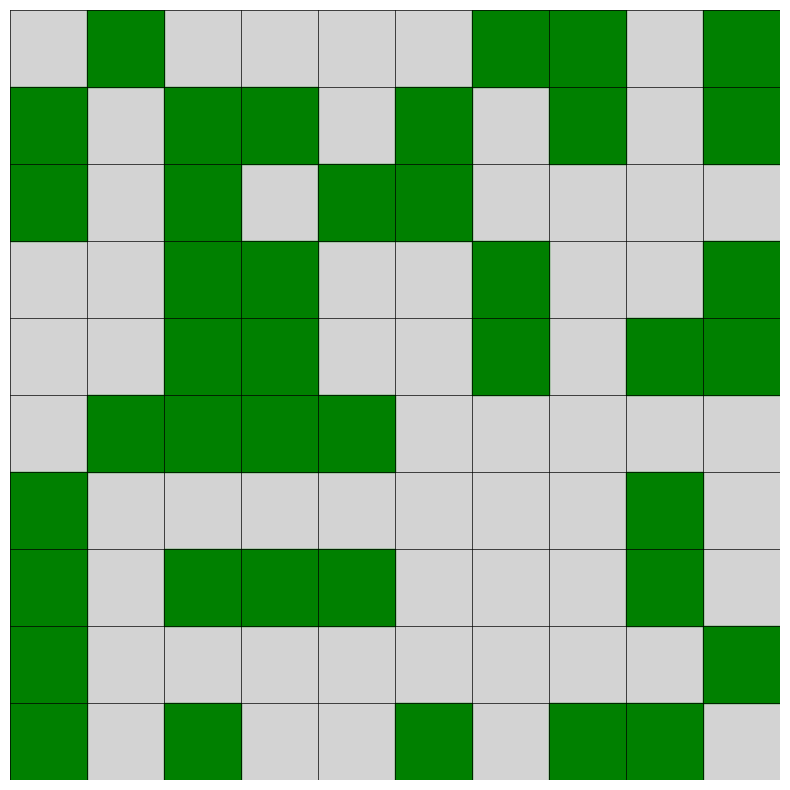

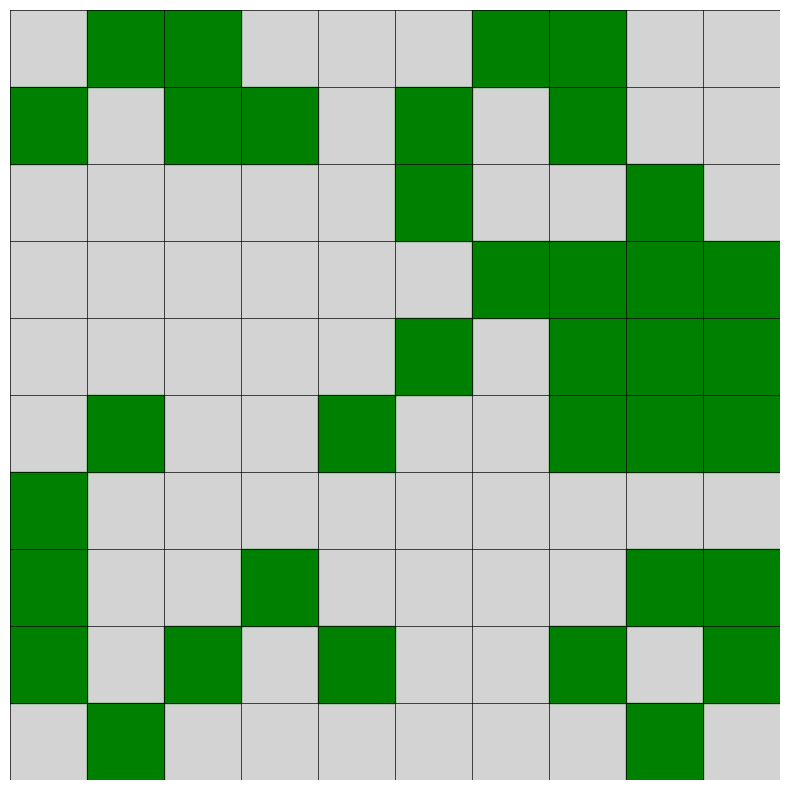

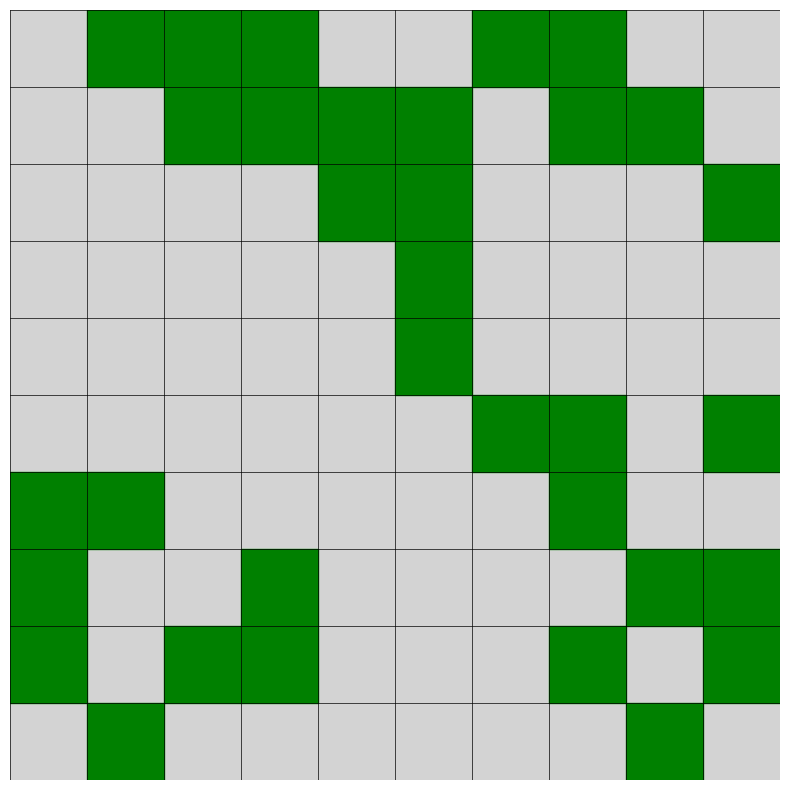

Thanks for Playing


In [34]:
play_game_of_life_1()

#### Level 2 (user-specified rules, 15 pts)


From a randomly selected initial subset of life cells, and a user-specified set of rules, find interesting patterns.


A user can specify a rule by inputting four integers: $b_1$, $b_2$, $d_1$, and $d_2$ between $0$ and $8$, and $d_1 \leq b_1 \leq b_2 \le d_2$. The rules are as follows:

- if a dead cell has at least $b_1$ and at most $b_2$ neighbors alive, then it the comes back to life
- if an alive cell has at least $d_1$ and at most $d_2$ neighbors alive, then it continues to be alive.
- if an alive cell has less than $d_1$ or more than $d_2$ neighbors alive, then the cell dies.

Notice that if $b_1 = 3$, $b_2 = 3$, $d_1 = 2$, and $d_2 = 3$, then the rules are the **basic rules**.


##### Task 2.1


The same as Task 1.1.


In [7]:
def init_life_state_2(n, m, p):
    """
    Generate an initial random subset of life cells (2D points)
    IN: n, int, number of rows
        m, int, number of columns
        p, float, probability of a cell being alive
    OUT: ndarray of shape (n, m), initial state of the cells
    """
    
    return init_life_state_1(n, m, p)

##### Task 2.2


Implement a Python function `update_life_state_2()` that takes the same in input as `update_life_state_1()` plus the four integers that defaults to `b1=3, b2=3, d1=2, d2=3` and returns a new 2D NumPy array representing the next state of the grid according to the rules specified above.


In [8]:
import numpy as np

def update_life_state_2(life_state, b1=3, b2=3, d1=2, d2=3, out_life_state=None):
    """
    For each cell evaluate the update rules specified above to obtain its new state
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        b1, int, lower bound of the number of neighbors for a dead cell to come back to life
        b2, int, upper bound of the number of neighbors for a dead cell to come back to life
        d1, int, lower bound of the number of neighbors for an alive cell to continue to be alive
        d2, int, upper bound of the number of neighbors for an alive cell to continue to be alive
        out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
    OUT: ndarray of shape (n, m), next state of the cells
    """
    if out_life_state == None:
        out_life_state = life_state.copy()
        
    if  b1==3 and b2 == 3 and d1==2 and d2 ==3:
        return update_life_state_1(life_state)
    else:
        x, y = life_state.shape
        for i in range(x):
            for j in range(y):
                #get souronding blocks exclude edge cases 
                neighbors = life_state[max(i - 1, 0):min(i + 2, x), max(j - 1, 0):min(j + 2, y)]
                count = np.sum(neighbors) - life_state[i, j]

                if life_state[i, j] == 1:  # Alive cell
                    if count < d1 or count > d2:
                        out_life_state[i, j] = 0  # Cell dies
                else:  # Dead cell
                    if b1 <= count <= b2:
                        out_life_state[i, j] = 1  # Cell becomes alive

    return out_life_state

##### Task 2.3


The same as Task 1.3.


##### Task 2.4


Implement a Python function `play_game_of_life_2()` that is similar to Task 1.4 `play_game_of_life_1()`, except that the user should be able to specify the rules, and when saving the initial collection of life cells and the final configuration, the function should also write the rules as a JSON file in the format of a dictionary. For the **basic rules**, the JSON format should be as follows:

```json
{
  "b1": 3,
  "b2": 3,
  "d1": 2,
  "d2": 3
}
```


In [37]:
def play_game_of_life_2():
    """
    Play the game of life
    IN: None
    OUT: None
    """
    # ask the user for initial state
    test = input("Enter the number of rows, columns and probability [0,1] of a cell being alive separated by space: ")

    try:
        n , m , p = test.split()
        n = int(n)
        m = int(m)
        p = float(p)
        start = init_life_state_2(n , m , p)
        draw_life_state_1(start)
    except:
        print("Invalid input")
        raise ValueError

    # ask the user for the rules
    #b1, int, lower bound of the number of neighbors for a dead cell to come back to life
       # b2, int, upper bound of the number of neighbors for a dead cell to come back to life
        #d1, int, lower bound of the number of neighbors for an alive cell to continue to be alive
       # d2, int, upper bound of the number of neighbors for an alive cell to continue to be alive
    test2 = input("Enter the rules b1, b2, d1, d2 separated by space with condition that d1 <= b1 <= b2 <= d2 and b1,b2,d1,d2 are integers in range [0,8]. Ex: 2 3 2 3")

    try:
        b1, b2, d1, d2 = test2.split()
        b1 = int(b1)
        b2 = int(b2)
        d1 = int(d1)
        d2 = int(d2)
        
        # Check if the rules are valid
        if not (0 <= b1 <= b2 <= d2 <= 8 and d1 <= b1):
            raise ValueError
    except:
        print("Invalid input")
        raise ValueError    
    
    # update the grid and display it at each iteration
    run = input("how many times do you want to update the grid?")
    
    current_state = start
   

    try:
        run = int(run)
        for _ in range(run):
            current_state = update_life_state_2(current_state, b1, b2, d1, d2)
            draw_life_state_1(current_state)
    except:
        print("Invalid input")
        raise ValueError        
    
    # ask the user if he/she wants to update more times
    more = input("Do you want to update more times? (y/n)")

    if more == "y":
        run = input("how many times do you want to update the grid?")
        try:
            run = int(run)
            for i in range(run):
                current_state = update_life_state_2(current_state, b1, b2, d1, d2)
                draw_life_state_1(current_state)
        except:
            print("Invalid input")
            raise ValueError
    if more == "n":
        pass

    # ask the user if he/she wants to save the initial collection of life cells and the final configuration as a csv file, and the rules as a JSON file
    save_to_file = input("Do you want to save the initial collection of life cells and the final configuration as a csv file, and the rules as a JSON file? (y/n)")

    if save_to_file == "y":
        import csv
        with open('initial.csv', 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(start)
            writer.writerows(current_state)
            file.close()
        import json
        rules = {
            "b1": b1,
            "b2": b2,
            "d1": d1,
            "d2": d2
        }
        with open('rules.json', 'w') as jsonfile:
            json.dump(rules, jsonfile, indent=4)  # Pretty print with indentation

        print("Files saved: 'life_states.csv' and 'rules.json'")
    if save_to_file == "n":
        pass 
    print("Thanks for Playing")

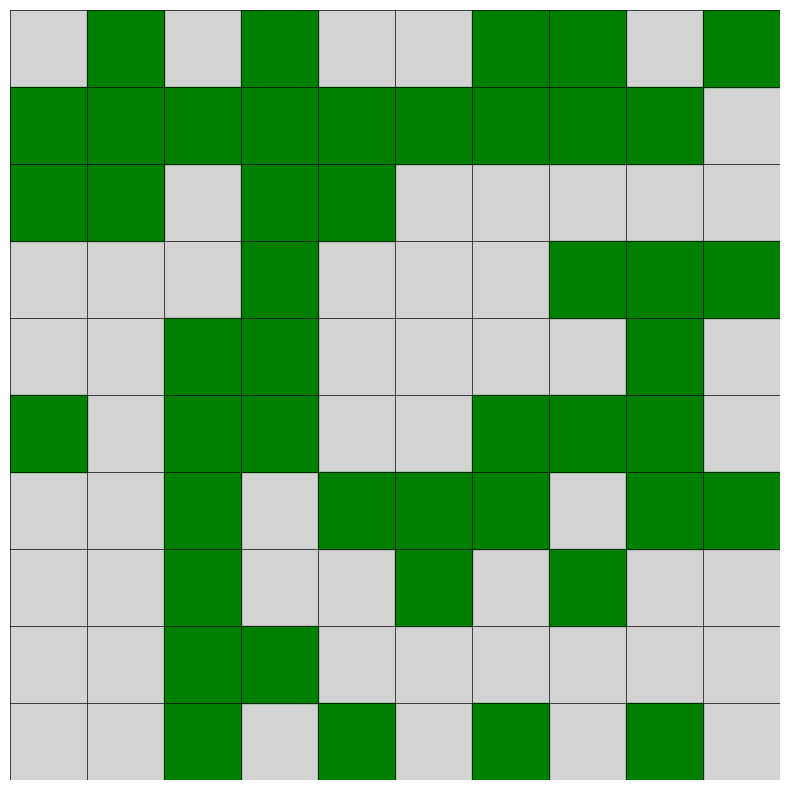

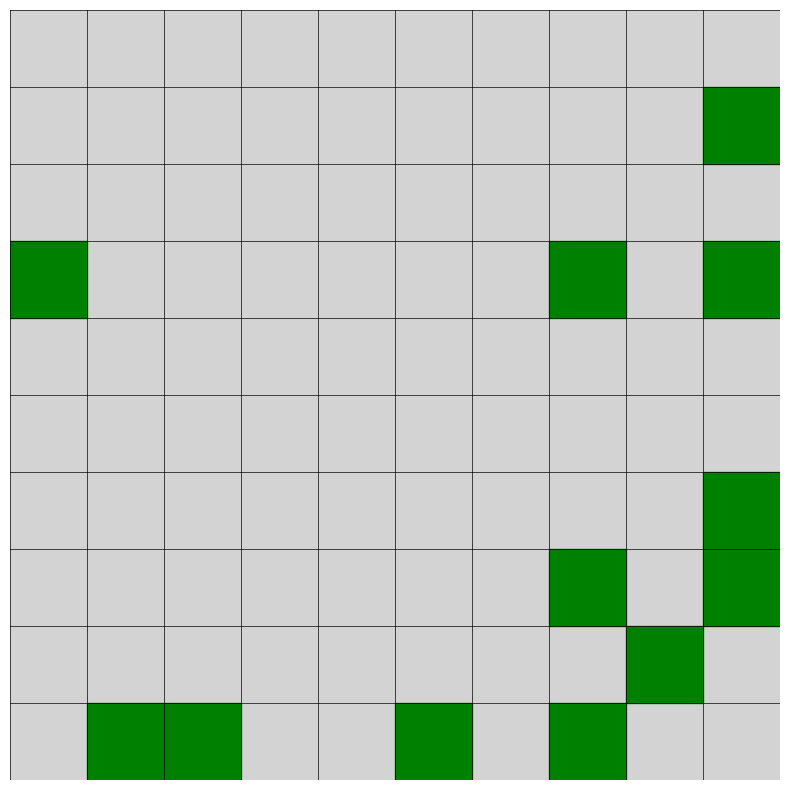

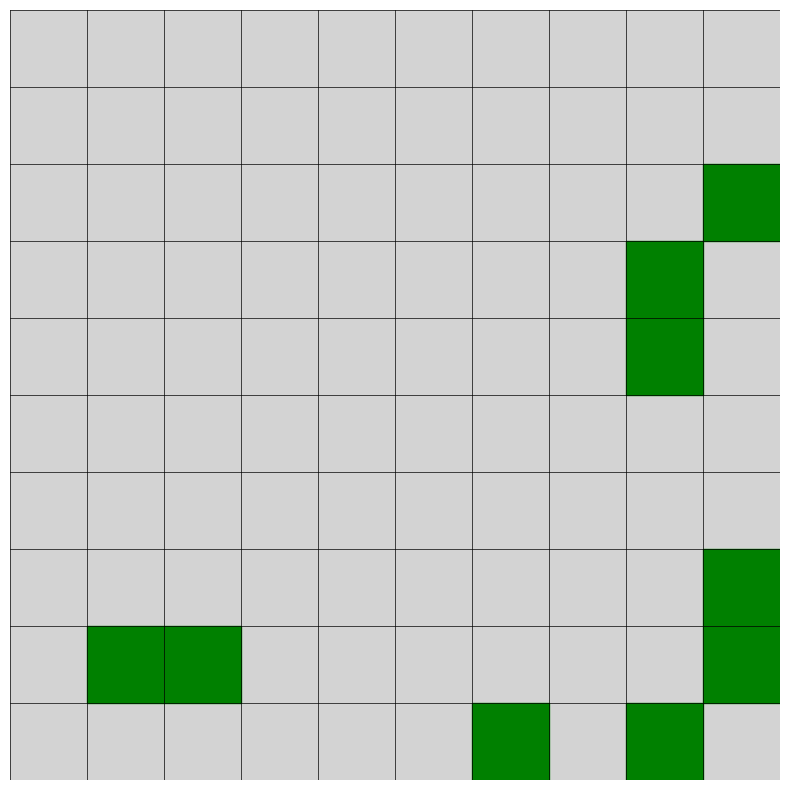

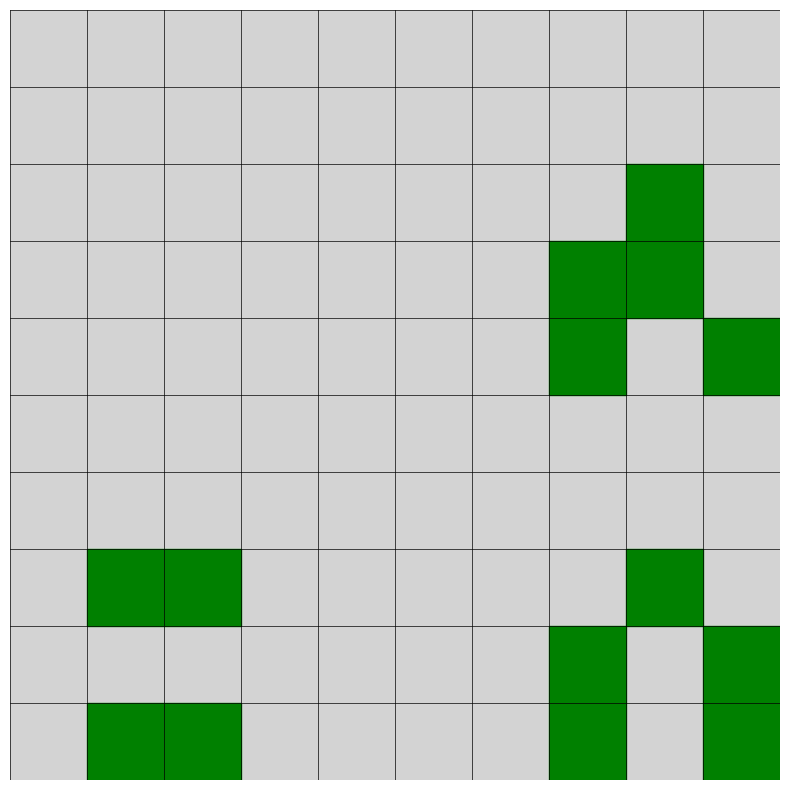

Thanks for Playing


In [38]:
play_game_of_life_2()

In [39]:
# Bonus Point # Generate a GUI interface
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def mainGameTask2():
    """
    Main function to run the game of life
    IN: None
    OUT: None
    """
    WINDOW_WIDTH = 1200
    WINDOW_HEIGHT = 600

    def init():
        """
        Initialize the game of life
        IN: None
        OUT: None
        """
        # Get the initial state
        rows = int(rows_entry.get())
        cols = int(cols_entry.get())
        prob = float(prob_entry.get())

        # Get the rules
        b1 = int(b1_entry.get())
        b2 = int(b2_entry.get())
        d1 = int(d1_entry.get())
        d2 = int(d2_entry.get())

        gameStates["rows"] = rows
        gameStates["cols"] = cols
        gameStates["prob"] = prob

        gameStates["b1"] = b1
        gameStates["b2"] = b2
        gameStates["d1"] = d1
        gameStates["d2"] = d2

        gameStates["statesDone"] = True

    def play():
        """
        Play the game of life
        IN: None
        OUT: None
        """
        # Set game state
        gameStates["isPaused"] = False

        # Check if gameOfLife is initialized
        if gameStates["gameOfLife"] is None:
            print("Init the game of life")

            gameStates["gameOfLife"] = init_life_state_2(gameStates["rows"], gameStates["cols"], gameStates["prob"])

        # Update the grid and display it at each iteration
        current_state = gameStates["gameOfLife"]

        def update():
            nonlocal current_state

            if gameStates["isPaused"] == True:
                return
            
            current_state = update_life_state_2(current_state, gameStates["b1"], gameStates["b2"], gameStates["d1"], gameStates["d2"])
            
            draw(current_state)

            window.after(500, update)

        update()
    
    def pause():
        """
        Pause the game of life
        IN: None
        OUT: None
        """
        gameStates["isPaused"] = True

    def reset():
        """
        Reset the game of life
        IN: None
        OUT: None
        """
        # Set game state
        gameStates["isPaused"] = True
        
        # Reset the game of life
        gameStates["gameOfLife"] = None

        ax.clear()

        canvas.draw()

    def next():
        """
        Update the game of life by one step
        IN: None
        OUT: None
        """

        if gameStates["isPaused"] == False:
            # The game is currenrtly running
            return

        # Check if gameOfLife is initialized
        if gameStates["gameOfLife"] is None:
            gameStates["gameOfLife"] = init_life_state_2(gameStates["rows"], gameStates["cols"], gameStates["prob"])

        # Update the grid and display it at each iteration
        current_state = gameStates["gameOfLife"]

        current_state = update_life_state_2(current_state, gameStates["b1"], gameStates["b2"], gameStates["d1"], gameStates["d2"])
            
        draw(current_state)

        # Save the updated state
        gameStates["gameOfLife"] = current_state
    
    def draw(life_state):
        """
        Draw the current state of the game
        IN: life_state, ndarray of shape (n, m), state of the cells
        OUT: None
        """

        n, m = life_state.shape

        ax.clear()
        ax.set_xlim(0, m)
        ax.set_ylim(0, n)

        # Draw all cells as gray initially (background grid)
        for x in range(n):
            for y in range(m):
                ax.fill(
                    [y, y, y+1, y+1],  # Use whole grid cells [left, left, right, right]
                    [x, x+1, x+1, x],  # [bottom, top, top, bottom]
                    color='lightgray'
                )
     
        for x in range(n + 1):
            ax.plot([0, m], [x, x], color='black', linewidth=0.5)  # Horizontal lines
        for y in range(m + 1):
            ax.plot([y, y], [0, n], color='black', linewidth=0.5)  # Vertical lines
    
        # Loop through the grid to highlight live cells (green)
        for x in range(n):
            for y in range(m):
                if life_state[x, y] == 1:
                    # Change cell color to green if it's alive
                    ax.fill(
                        [y, y, y+1, y+1],  # Same grid alignment
                        [x, x+1, x+1, x],
                        color='green'
                    )

        canvas.draw()

    def onWindowClosed():
        """
        Handle the window close event
        IN: None
        OUT: None
        """

        # Destroy figure
        fig.clf()

        window.quit()
        window.destroy()

        print("Window closed. End of the game.")

    # Define game states
    gameStates = {
        "rows": 0,
        "cols": 0,
        "prob": 0,
        "b1": 0,
        "b2": 0,
        "d1": 0,
        "d2": 0,
        "gameOfLife": None,
        "isPaused": True,
        "statesDone": False,
    }

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.axis("off")  # Turn off axes for better visualization
    ax.invert_yaxis()  # Align the plot to match matrix orientation
    ax.set_aspect('equal')  # Ensure squares are not distorted

    window = tk.Tk()

    # Window size
    window.geometry(f"{WINDOW_WIDTH}x{WINDOW_HEIGHT}")

    # Window title
    window.title("Game of Life")

    # Window background color
    window.configure(bg="white")

    window.protocol("WM_DELETE_WINDOW", onWindowClosed)

    # Create input fields to get the initial state
    # All aligns to the left, display inline (side-by-side)
    rows_label = tk.Label(window, text="Number of rows:")
    rows_label.grid(row=0, column=0, padx=10, pady=10, sticky="w")

    rows_entry = tk.Entry(window)
    rows_entry.grid(row=0, column=1, padx=10, pady=10, sticky="w")

    cols_label = tk.Label(window, text="Number of columns:")
    cols_label.grid(row=0, column=2, padx=10, pady=10, sticky="w")

    cols_entry = tk.Entry(window)
    cols_entry.grid(row=0, column=3, padx=10, pady=10, sticky="w")

    prob_label = tk.Label(window, text="Probability of a cell being alive:")
    prob_label.grid(row=0, column=4, padx=10, pady=10, sticky="w")

    prob_entry = tk.Entry(window)
    prob_entry.grid(row=0, column=5, padx=10, pady=10, sticky="w")

    # Create input fields to get the rules
    b1_label = tk.Label(window, text="b1:")
    b1_label.grid(row=1, column=0, padx=10, pady=10, sticky="w")

    b1_entry = tk.Entry(window)
    b1_entry.grid(row=1, column=1, padx=10, pady=10, sticky="w")

    b2_label = tk.Label(window, text="b2:")
    b2_label.grid(row=1, column=2, padx=10, pady=10, sticky="w")

    b2_entry = tk.Entry(window)
    b2_entry.grid(row=1, column=3, padx=10, pady=10, sticky="w")

    d1_label = tk.Label(window, text="d1:")
    d1_label.grid(row=1, column=4, padx=10, pady=10, sticky="w")

    d1_entry = tk.Entry(window)
    d1_entry.grid(row=1, column=5, padx=10, pady=10, sticky="w")

    d2_label = tk.Label(window, text="d2:")
    d2_label.grid(row=1, column=6, padx=10, pady=10, sticky="w")

    d2_entry = tk.Entry(window)
    d2_entry.grid(row=1, column=7, padx=10, pady=10, sticky="w")

    # Create play, stop, reset, and next buttons
    init_button = tk.Button(window, text="Init", bg="purple", fg="white", command=lambda: init())
    init_button.grid(row=2, column=0, padx=10, pady=10, sticky="w")

    play_button = tk.Button(window, text="Play", bg="green", fg="white", command=lambda: play())
    play_button.grid(row=2, column=1, padx=10, pady=10, sticky="w")

    stop_button = tk.Button(window, text="Stop", bg="red", fg="white", command=lambda: pause())
    stop_button.grid(row=2, column=2, padx=10, pady=10, sticky="w")

    reset_button = tk.Button(window, text="Reset", bg="blue", fg="white", command=lambda: reset())
    reset_button.grid(row=2, column=3, padx=10, pady=10, sticky="w")

    next_button = tk.Button(window, text="Next", bg="orange", fg="white", command=lambda: next())
    next_button.grid(row=2, column=4, padx=10, pady=10, sticky="w")

    canvas = FigureCanvasTkAgg(fig, master=window)
    canvasWidget = canvas.get_tk_widget()
    canvasWidget.grid(row=3, column=0, columnspan=8, padx=10, pady=10, sticky="w")
    
    # Run the Tkinter application
    window.mainloop()

mainGameTask2()

Init the game of life
Window closed. End of the game.


<Figure size 640x480 with 0 Axes>

#### Level 3 (non-binary states, 30 pts)


In this level, the states of the cells are not binary. Instead, the states are integers between $0$ and $255$, each representing a user specified state. For example, each cell may have three possibilities:

- $0$ to represent a removed cell
- $1$ to represent a live and susceptible cell
- $2$ to represent a cell infected by a virus

A set of rules could be:

A subset of cells is selected randomly to be infected (2), and the rest are susceptible (1). The grid is updated in each time step as follows:

- Infected (2) cells get a chance to pass the infection along to each of their Susceptible (1) neighbors, with a probability equal to the transmission rate.
- Infected (2) cells have a chance to transition to the removed (0) state, indicating that they are no longer capable of infecting others or being infected again. The probability of this transition is equal to the recovery rate.


```mermaid
stateDiagram-v2

S: Susceptible
I: Infected
R: Removed

S --> I: neighbor of an infected cell, and the infected cell infects the susceptible cell
S --> S: no infected neighbor, or the infected cell does not infect the susceptible cell
I --> R: recovers
R --> R
```


##### Task 3.1


After playing the game at https://meltingasphalt.com/interactive/going-critical/ and https://ncase.me/simulating/model/

- Implement a Python function `init_life_state_3()` by using NumPy to generate an initial random subset of non-binary cells.
- Implement a Python function `draw_life_state_3()` by using matplotlib to display the selected collection of cells (points). Use the following line of Python code to paint the background of the selected collection of cells in their respective colors with transparency.

```python
def draw_cell_background(x, y, color):
    plt.fill([x-0.5, x-0.5, x+0.5, x+0.5], [y-0.5, y+0.5, y+0.5, y-0.5], color=color, alpha=0.5)
```


```python
def init_life_state_3(n, m, p_list, states):
    """
    Generate an initial random subset of non-binary cells
    IN: n, int, number of rows
        m, int, number of columns
        p_list, list of float, probabilities of each state
        states, list of int, possible states of the cells
    OUT: ndarray of shape (n, m), initial state of the cells
    """
    pass
```

```python
def draw_life_state_3(life_state, colors):
    """
    Display the 2D positions of the selected collection of cells (2D points)
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        colors, list of str, colors of the states
    OUT: None
    """
    pass
```


In [19]:
import numpy as np
import matplotlib.pyplot as plt

def init_life_state_3(n, m, p_list):
    # took out state 0 for nothing 1 for alive 2 for infected 
    """
    Generate an initial random subset of non-binary cells
    IN: n, int, number of rows
        m, int, number of columns
        p_list, list of float, probabilities of each state
        states, list of int, possible states of the cells
    OUT: ndarray of shape (n, m), initial state of the cells
    """
    p_list = np.array(p_list)
    
    
    # Create an empty board
    board = np.zeros((n, m), dtype=int)
    
    # Determine the number of cells for each state
    total_cells = n * m

    num_s = p_list[0] # Susceptible
    num_i =  p_list[1]  # Infected
    num_s = float(num_s)
    num_i = float(num_i)
    if num_s > 1:
        raise ValueError 
    if num_i > 1:
        raise ValueError
    num_s = round(num_s * total_cells)
    num_i = round(num_i * total_cells)
       
    
    
    # Assign susceptible cells (1)
    z = 0
    while z < num_s:
        x, y = np.random.randint(n), np.random.randint(m)
        if  board[x, y] == 0:  # Ensure the cell is not already assigned
            
            board[x, y] = 1
            z += 1
    
    # Assign infected cells (2)
    b = 0
    while b < num_i:
        x, y = np.random.randint(n), np.random.randint(m)
        if board[x, y] == 0:  # Ensure the cell is not already assigned
            
            board[x, y] = 2
            b += 1
        
    # Assign removed cells (0)
    
    
    return board

#had colors i took them out
def draw_life_state_3(life_state):
    """
    Display the 2D positions of the selected collection of cells (2D points)
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        colors, list of str, colors of the states
    OUT: None
    """
    n, m = life_state.shape

    # Create the plot
    plt.figure(figsize=(m, n))  # Adjust size dynamically based on grid dimensions
    plt.axis("off")  # Turn off axes for better visualization
    
    # Draw all cells as light gray initially (background grid)
    for x in range(n):
        for y in range(m):
            plt.fill(
                [y, y, y+1, y+1],  # Use whole grid cells [left, left, right, right]
                [x, x+1, x+1, x],  # [bottom, top, top, bottom]
                color='lightgray'
            )
    
    # Set up precise plot limits
    plt.xlim(0, m)
    plt.ylim(0, n)
    plt.gca().invert_yaxis()  # Align the plot to match matrix orientation
    plt.gca().set_aspect('equal')  # Ensure squares are not distorted
    
    # Draw grid lines
    for x in range(n + 1):
        plt.plot([0, m], [x, x], color='black', linewidth=0.5)  # Horizontal lines
    for y in range(m + 1):
        plt.plot([y, y], [0, n], color='black', linewidth=0.5)  # Vertical lines

    # Loop through the grid to highlight the cells based on their state
    for x in range(n):
        for y in range(m):
            if life_state[x, y] == 1:
                # Susceptible cells (state 1) - color green
                plt.fill(
                    [y, y, y+1, y+1],  # Same grid alignment
                    [x, x+1, x+1, x],
                    color='green'
                )
            elif life_state[x, y] == 2:
                # Infected cells (state 2) - color red
                plt.fill(
                    [y, y, y+1, y+1],  # Same grid alignment
                    [x, x+1, x+1, x],
                    color='red'
                )
    
    # Final display
    plt.show()

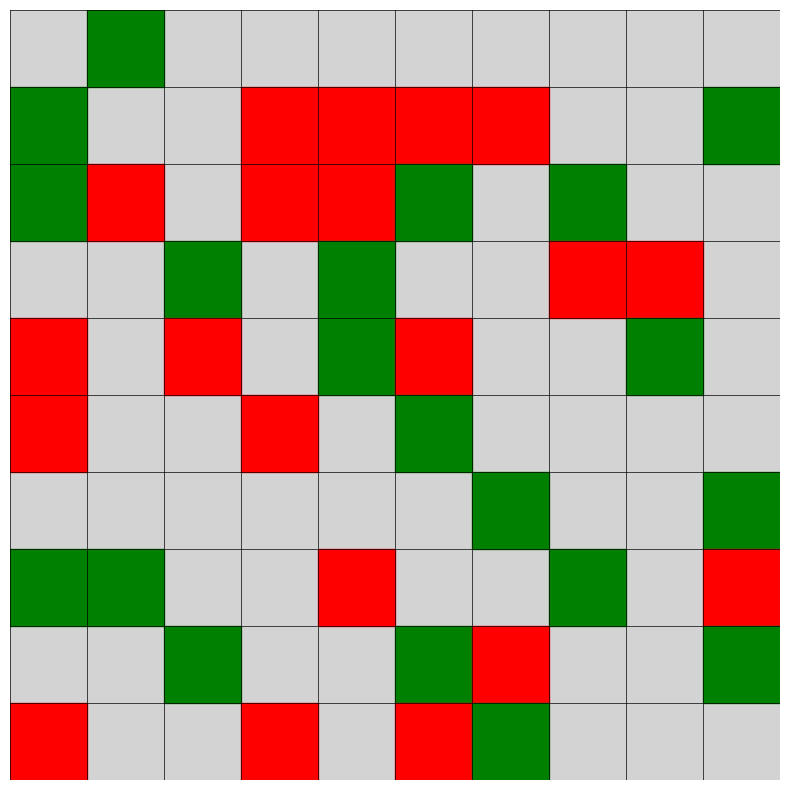

In [20]:
board = init_life_state_3(10, 10, [0.2, 0.2])

draw_life_state_3(board)

##### Task 3.2


In [30]:
rules3 = {
    0: {
        # If a cell is removed, it stays removed
        "turn_to": 0  # always stay removed
    },
    1: {
        # If a cell is susceptible, it can get infected by an infected neighbor
        "neighbor_to": {
            "at_least": 1,
            "at_most": 9,  # always true
        },
        "become_infected": {
            "prob": 0.2,  # transmission rate 25%
            "turn_to": 2
        },
        "stay_susceptible": {
            # prob is 1 - transmission rate above
            "turn_to": 1
        }
    },
    2: {  # infected cells
        "recover_to": {
            "prob": 0.5,  # recovery rate 50%,
            "turn_to": 0
        },
        "stay_infected": {
            # prob is 1 - recovery rate above
            "turn_to": 2
        }
    }
}

In [26]:
import numpy as np

import numpy as np
def parse_rules(rules_string):
    """
    Parse user-input rules string into a dictionary of rules.
    
    Expected format: 
    - Comma-separated rules
    - Each rule is in the format 'current_state:condition:new_state:probability'
    
    Example input: 
    "1:infected>=1:2:0.25, 2:always:1:0.5, 2:always:0:0.1"
    """
    rules_dict = {}
    
    # Split rules and process each
    for rule in rules_string.split(','):
        rule = rule.strip()
        parts = rule.split(':')
        
        if len(parts) != 4:
            raise ValueError(f"Invalid rule format: {rule}")
        
        current_state = int(parts[0])
        condition = parts[1]
        new_state = int(parts[2])
        probability = float(parts[3])
        
        # Store rule in dictionary
        if current_state not in rules_dict:
            rules_dict[current_state] = []
        
        rules_dict[current_state].append({
            'condition': condition,
            'new_state': new_state,
            'probability': probability
        })
    
    return rules_dict

def check_neighbors(x, y, life_state, state_to_check=2):
    """
    Helper function to count neighbors of a specific state.
    
    IN: x, y - coordinates of the current cell
        life_state - the grid of cell states
        state_to_check - the state of neighbors to count
    OUT: number of neighbors in the specified state
    """
    n, m = life_state.shape
    neighbor_count = 0
    
    for dx in range(-1, 2):
        for dy in range(-1, 2):
            nx, ny = x + dx, y + dy
            if 0 <= nx < n and 0 <= ny < m and (dx != 0 or dy != 0):
                if life_state[nx, ny] == state_to_check:
                    neighbor_count += 1
    
    return neighbor_count

def update_life_state_flexible(life_state, rules_dict, out_life_state=None):
    """
    Update cell states based on flexible, user-defined rules.
    
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        rules_dict, dict, rules for updating the cells
        out_life_state, ndarray of shape (n, m), for storing the next state of the cells
    OUT: ndarray of shape (n, m), next state of the cells
    """
    n, m = life_state.shape
    
    # Create the output grid if it's None
    if out_life_state is None:
        out_life_state = np.copy(life_state)
    
    # Iterate over each cell
    for x in range(n):
        for y in range(m):
            current_state = life_state[x, y]
            
            # Skip if no rules for current state
            if current_state not in rules_dict:
                out_life_state[x, y] = current_state
                continue
            
            # Check each rule for the current state
            for rule in rules_dict[current_state]:
                condition = rule['condition']
                new_state = rule['new_state']
                probability = rule['probability']
                
                # Evaluate condition
                condition_met = False
                if condition == 'always':
                    condition_met = True
                elif condition.startswith('infected'):
                    # Parse the comparison (e.g., 'infected>=1')
                    comp_op = condition[8:10]
                    threshold = int(condition[10:])
                    infected_count = check_neighbors(x, y, life_state, state_to_check=2)
                    
                    if comp_op == '>=':
                        condition_met = infected_count >= threshold
                    elif comp_op == '==':
                        condition_met = infected_count == threshold
                    elif comp_op == '<=':
                        condition_met = infected_count <= threshold
                
                # Apply rule if condition is met
                if condition_met:
                    prob = np.random.random()
                    if prob <= probability:
                        out_life_state[x, y] = new_state
                        break  # Stop checking rules after first successful one
    
    return out_life_state
               





##### Task 3.3


Similar to Task 1.3, except that the function to be called is `draw_life_state_3()`.


##### Task 3.4


Implement a Python function `play_game_of_life_3()` that is similar to Task 1.4 `play_game_of_life_1()`, except that the user should be able to specify the rules as a JSON file in the format of a dictionary. When saving the initial collection of life cells and the final configuration, the function should also write the rules as a JSON file in the format of a dictionary.


```python
def play_game_of_life_3():
    """
    Play the game of life
    IN: None
    OUT: None
    """
    # ask the user for initial state

    # ask the user for the rules
    pass
    # update the grid and display it at each iteration
    pass
    # ask the user if he/she wants to update more times
    pass
    # ask the user if he/she wants to save the initial collection of life cells and the final configuration as a csv file, and the rules as a JSON file
    pass
```


In [42]:
import numpy as np
import csv
import json

def get_flexible_rules():
    """
    Collect rules for live (1) and infected (2) cells interactively.
    
    Returns a rules dictionary with parsed rules.
    """
    rule_strings = []
    
    # Rule input for live cells (1)
    live_prob = input("Rule for live cells (1): Enter probability of changing state (0-1): ")
    rule_strings.append(f"1:infected>=1:2:{live_prob}")
    
    # Rule input for infected cells (2)
    infected_prob = input("Rule for infected cells (2): Enter probability of changing state (0-1): ")
    rule_strings.append(f"2:always:1:{infected_prob}")
    
    # Add standard 10% death chance for infected cells
    rule_strings.append("2:always:0:0.1")
    
    # Always add default dead cell rule
    rule_strings.append("0:always:0:1.0")
    
    # Create rules dictionary
    rules_input = ", ".join(rule_strings)
    
    return parse_rules(rules_input)

# Modify play function to use this new rule input
def play_game_of_life_3():
    """
    Play the flexible game of life with simplified rule input.
    """
    # Ask user for initial state parameters
    game_info = input("Input: rows columns [percent alive] [percent infected] (e.g., 10 10 0.3 0.4): ")
    n, m, p1, p2 = map(float, game_info.split())
    n, m = int(n), int(m)
    
    # Initialize grid
    start = init_life_state_3(n, m, [p1, p2])
    current_state = start
    
    # Draw initial state
    draw_life_state_3(current_state)
    
    # Get rules from user
    rules_dict = get_flexible_rules()
    
    # Ask for number of iterations
    times_to_run = int(input("How many times do you want to update the grid? "))
    
    # Run iterations
    for i in range(times_to_run):
        current_state = update_life_state_flexible(current_state, rules_dict)
        draw_life_state_3(current_state)
    more = input("Do you want to update more times? (y/n)")
    if more == "y":
        run = input("how many times do you want to update the grid?")
        try:
            run = int(run)
            for i in range(run):
                current_state = update_life_state_2(current_state, b1, b2, d1, d2)
                draw_life_state_1(current_state)
        except:
            print("Invalid input")
            raise ValueError
    if more == "n":
        pass
    # ask the user if he/she wants to save the initial collection of life cells and the final configuration as a csv file, and the rules as a JSON file
    save_to_file = input("Do you want to save the initial collection of life cells and the final configuration as a csv file, and the rules as a JSON file? (y/n)")
    if save_to_file == "y":
        import csv
        with open('initial.csv', 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(start)
            writer.writerows(current_state)
            file.close()
        import json
        
        with open('rules.json', 'w') as jsonfile:
            json.dump(rules_dict, jsonfile, indent=4)  # Pretty print with indentation

        print("Files saved: 'life_states.csv' and 'rules.json'")
    if save_to_file == "n":
        pass 
    print("Thanks for Playing")

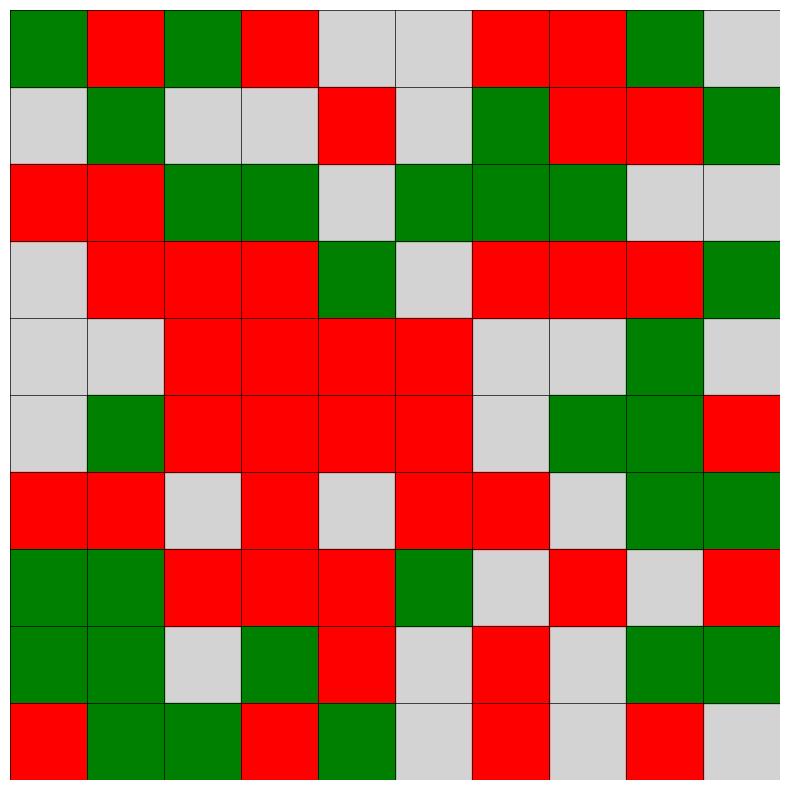

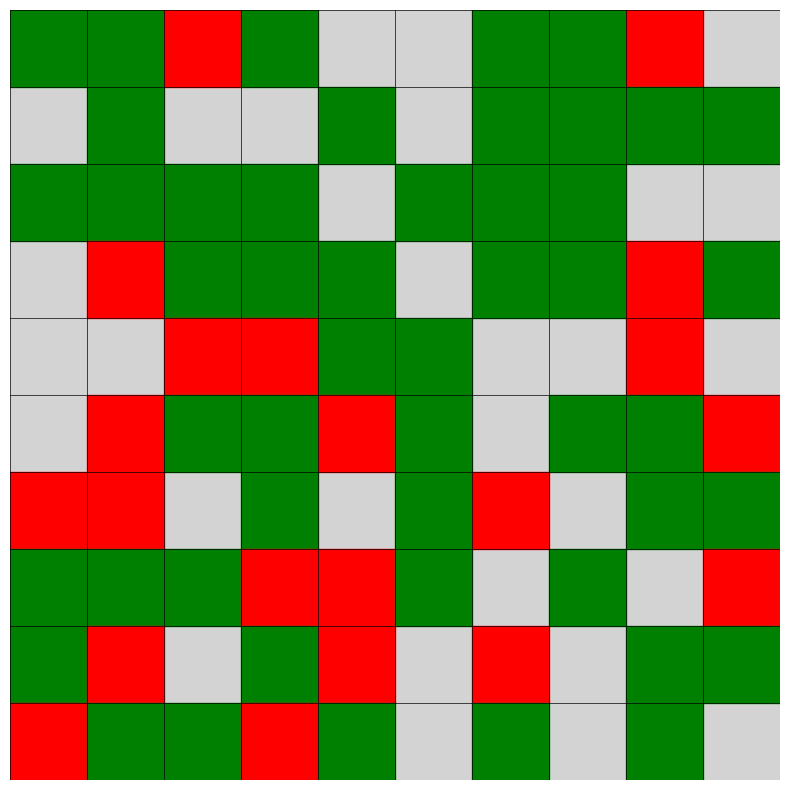

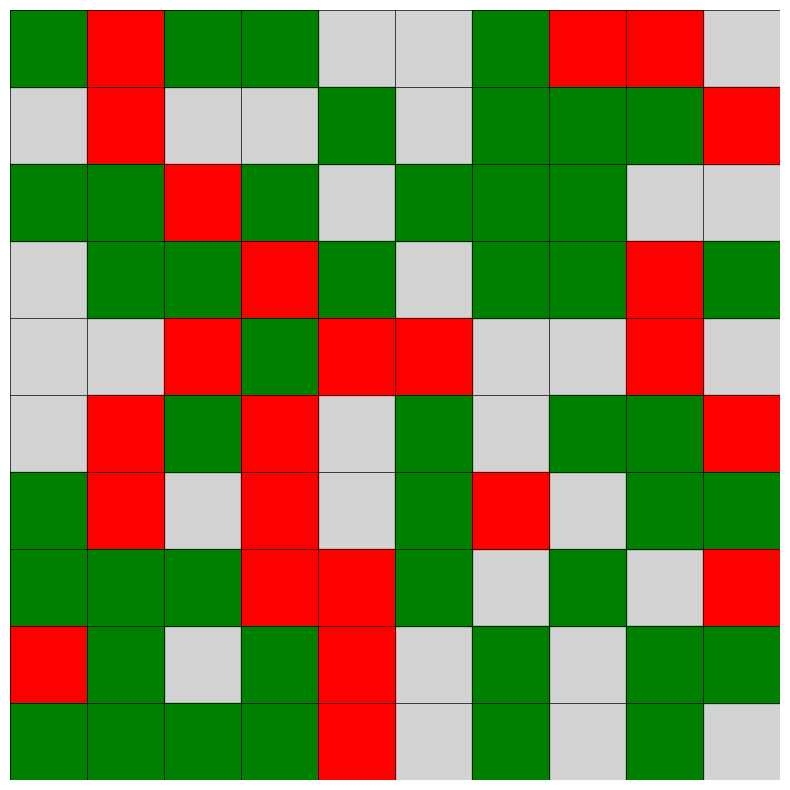

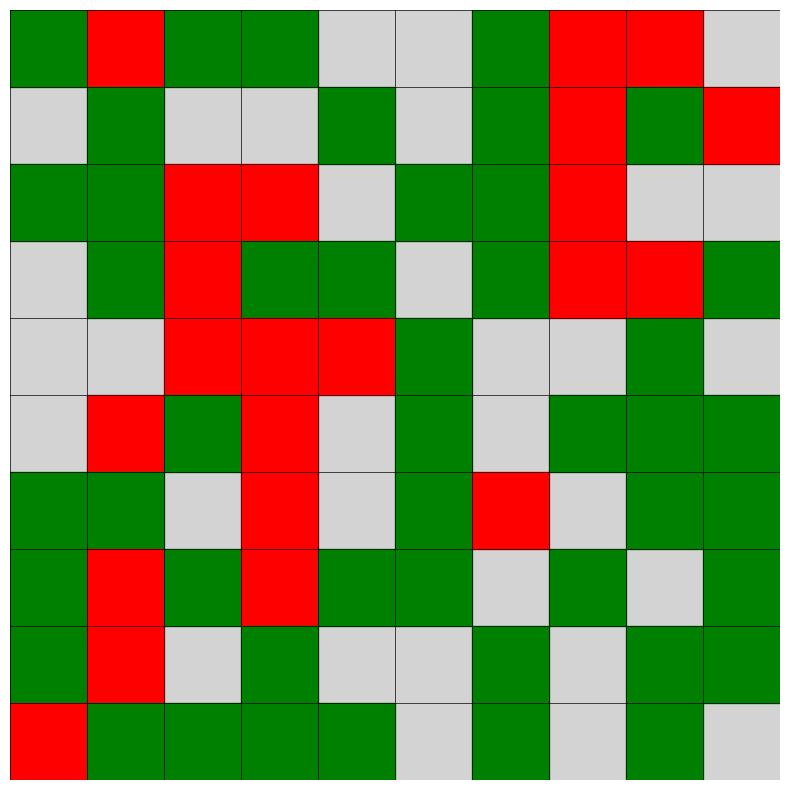

Files saved: 'life_states.csv' and 'rules.json'
Thanks for Playing


In [43]:
play_game_of_life_3()

In [33]:
# Bonus Point GUI interface
# Bonus Point # Generate a GUI interface
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.patches as mpatches

def mainGameTask3():
    """
    Main function to run the game of life
    IN: None
    OUT: None
    """
    WINDOW_WIDTH = 1200
    WINDOW_HEIGHT = 800

    def init():
        """
        Initialize the game of life
        IN: None
        OUT: None
        """
        # Get the initial state
        rows = int(rows_entry.get())
        cols = int(cols_entry.get())
        prob = float(prob_entry.get())
        infected_prob = float(infected_prob_entry.get())
        
        gameStates["rows"] = rows
        gameStates["cols"] = cols
        gameStates["prob"] = prob
        gameStates["infected_prob"] = infected_prob

        gameStates["statesDone"] = True

    def play():
        """
        Play the game of life
        IN: None
        OUT: None
        """
        # Set game state
        gameStates["isPaused"] = False

        # Check if gameOfLife is initialized
        if gameStates["gameOfLife"] is None:
            print("Init the game of life")

            gameStates["gameOfLife"] = init_life_state_3(gameStates["rows"], gameStates["cols"], [gameStates["prob"], gameStates["infected_prob"]])
            
        # Update the grid and display it at each iteration
        current_state = gameStates["gameOfLife"]

        def update():
            nonlocal current_state

            if gameStates["isPaused"] == True:
                return
            
            current_state = update_life_state_3(current_state, gameStates["rules"])
            
            draw(current_state)

            window.after(500, update)

        update()
    
    def pause():
        """
        Pause the game of life
        IN: None
        OUT: None
        """
        gameStates["isPaused"] = True

    def reset():
        """
        Reset the game of life
        IN: None
        OUT: None
        """
        # Set game state
        gameStates["isPaused"] = True
        
        # Reset the game of life
        gameStates["gameOfLife"] = None

        ax.clear()

        canvas.draw()

    def next():
        """
        Update the game of life by one step
        IN: None
        OUT: None
        """

        if gameStates["isPaused"] == False:
            # The game is currenrtly running
            return

        # Check if gameOfLife is initialized
        if gameStates["gameOfLife"] is None:
            gameStates["gameOfLife"] = init_life_state_3(gameStates["rows"], gameStates["cols"], [gameStates["prob"], gameStates["infected_prob"]])

        # Update the grid and display it at each iteration
        current_state = gameStates["gameOfLife"]

        current_state = update_life_state_3(current_state, gameStates["rules"])
            
        draw(current_state)

        # Save the updated state
        gameStates["gameOfLife"] = current_state
    
    def draw(life_state):
        """
        Draw the current state of the game
        IN: life_state, ndarray of shape (n, m), state of the cells
        OUT: None
        """

        n, m = life_state.shape

        ax.clear()
        ax.set_xlim(0, m)
        ax.set_ylim(0, n)

        # Draw all cells as light gray initially (background grid)
        for x in range(n):
            for y in range(m):
                ax.fill(
                    [y, y, y+1, y+1],  # Use whole grid cells [left, left, right, right]
                    [x, x+1, x+1, x],  # [bottom, top, top, bottom]
                    color='lightgray'
                )

        # Draw grid lines
        for x in range(n + 1):
            ax.plot([0, m], [x, x], color='black', linewidth=0.5)  # Horizontal lines
        for y in range(m + 1):
            ax.plot([y, y], [0, n], color='black', linewidth=0.5)  # Vertical lines

        # Loop through the grid to highlight the cells based on their state
        for x in range(n):
            for y in range(m):
                if life_state[x, y] == 1:
                    # Susceptible cells (state 1) - color green
                    ax.fill(
                        [y, y, y+1, y+1],  # Same grid alignment
                        [x, x+1, x+1, x],
                        color='green'
                    )
                elif life_state[x, y] == 2:
                    # Infected cells (state 2) - color red
                    ax.fill(
                        [y, y, y+1, y+1],  # Same grid alignment
                        [x, x+1, x+1, x],
                        color='red'
                    )

        canvas.draw()

    def onWindowClosed():
        """
        Handle the window close event
        IN: None
        OUT: None
        """

        # Destroy figure
        fig.clf()

        window.quit()
        window.destroy()

        print("Window closed. End of the game.")

    # Define game states
    gameStates = {
        "rows": 0,
        "cols": 0,
        "prob": 0,
        "infected_prob": 0,
        "rules": rules3,
        "gameOfLife": None,
        "isPaused": True,
        "statesDone": False,
    }

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.axis("off")  # Turn off axes for better visualization
    ax.invert_yaxis()  # Align the plot to match matrix orientation
    ax.set_aspect('equal')  # Ensure squares are not distorted

    window = tk.Tk()

    # Window size
    window.geometry(f"{WINDOW_WIDTH}x{WINDOW_HEIGHT}")

    # Window title
    window.title("Game of Life")

    # Window background color
    window.configure(bg="white")

    window.protocol("WM_DELETE_WINDOW", onWindowClosed)

    # Create input fields to get the initial state
    # All aligns to the left, display inline (side-by-side)
    rows_label = tk.Label(window, text="Number of rows:")
    rows_label.grid(row=0, column=0, padx=10, pady=10, sticky="w")

    rows_entry = tk.Entry(window)
    rows_entry.grid(row=0, column=1, padx=10, pady=10, sticky="w")

    cols_label = tk.Label(window, text="Number of columns:")
    cols_label.grid(row=0, column=2, padx=10, pady=10, sticky="w")

    cols_entry = tk.Entry(window)
    cols_entry.grid(row=0, column=3, padx=10, pady=10, sticky="w")

    prob_label = tk.Label(window, text="Prob alive:")
    prob_label.grid(row=0, column=4, padx=10, pady=10, sticky="w")

    prob_entry = tk.Entry(window)
    prob_entry.grid(row=0, column=5, padx=10, pady=10, sticky="w")
    
    infected_prob_label = tk.Label(window, text="Prob infected:")
    infected_prob_label.grid(row=0, column=6, padx=10, pady=10, sticky="w")
    
    infected_prob_entry = tk.Entry(window)
    infected_prob_entry.grid(row=0, column=7, padx=10, pady=10, sticky="w")

    # Create play, stop, reset, and next buttons
    init_button = tk.Button(window, text="Init", bg="purple", fg="white", command=lambda: init())
    init_button.grid(row=1, column=0, padx=10, pady=10, sticky="w")

    play_button = tk.Button(window, text="Play", bg="green", fg="white", command=lambda: play())
    play_button.grid(row=1, column=1, padx=10, pady=10, sticky="w")

    stop_button = tk.Button(window, text="Stop", bg="red", fg="white", command=lambda: pause())
    stop_button.grid(row=1, column=2, padx=10, pady=10, sticky="w")

    reset_button = tk.Button(window, text="Reset", bg="blue", fg="white", command=lambda: reset())
    reset_button.grid(row=1, column=3, padx=10, pady=10, sticky="w")

    next_button = tk.Button(window, text="Next", bg="orange", fg="white", command=lambda: next())
    next_button.grid(row=1, column=4, padx=10, pady=10, sticky="w")

    canvas = FigureCanvasTkAgg(fig, master=window)
    canvasWidget = canvas.get_tk_widget()
    canvasWidget.grid(row=2, column=0, columnspan=8, padx=10, pady=10, sticky="w")
    
    # Add labels underneath
    legend_recovered = tk.Label(window, text="Removed (0)", bg="lightgray")
    legend_recovered.grid(row=3, column=0, padx=10, pady=10, sticky="w")
    
    legend_infected = tk.Label(window, text="Susceptible (1)", bg="green")
    legend_infected.grid(row=3, column=1, padx=10, pady=10, sticky="w")
    
    legend_removed = tk.Label(window, text="Infected (2)", bg="red")
    legend_removed.grid(row=3, column=2, padx=10, pady=10, sticky="w")
    
    # Run the Tkinter application
    window.mainloop()

mainGameTask3()

invalid command name "5041032832update"
    while executing
"5041032832update"
    ("after" script)


Init the game of life
Init the game of life
Window closed. End of the game.


<Figure size 640x480 with 0 Axes>

#### References


> - Gardner, Martin (October 1970). "The fantastic combinations of John Conway's new solitaire game 'life'" (PDF). Mathematical Games. Scientific American. Vol. 223, no. 4. pp. 120–123. doi:10.1038/scientificamerican1070-120. JSTOR 24927642.
> - Berlekamp, E. R.; Conway, John Horton; Guy, R. K. (2001–2004). Winning Ways for your Mathematical Plays (2nd ed.). A K Peters Ltd.
> - Izhikevich, Eugene M.; Conway, John H.; Seth, Anil (2015-06-21). "Game of Life". Scholarpedia. 10 (6): 1816. Bibcode:2015SchpJ..10.1816I. doi:10.4249/scholarpedia.1816. ISSN 1941-6016.
> - "NaiveLife Emulated: A reading-order simulation of Life". ConwayLife.com. 24 May 2020.
> - Goucher, Adam. "Re: Thread For Your Accidental Discoveries". ConwayLife.com.
> - Ian07. "Re: Strange spaceship that is supposed to be impossible and infinite cell spread". ConwayLife.com. "I'm pretty sure this is because you've accidentally created an implementation of what's sometimes known as NaiveLife (as it's a common mistake made by many people coding CGoL for the first time):"
> - Brown, Nico; Cheng, Carson; Jacobi, Tanner; Karpovich, Maia; Merzenich, Matthias; Raucci, David; Riley, Mitchell (5 December 2023). "Conway's Game of Life is Omniperiodic". arXiv:2312.02799 [math.CO].
> - "LifeWiki:Game of Life Status page - LifeWiki". conwaylife.com.
> - Stone, Alex (2024-01-18). "Math's 'Game of Life' Reveals Long-Sought Repeating Patterns". Quanta Magazine.
> - "Conway's Game of Life". Rosetta Code. June 7, 2024.
